# part 1

In [1]:
import pandas as pd
import dask.bag as db
import json

In [1]:
json_file_0 = "dblp-ref-0.json"
json_file_1 = "dblp-ref-1.json"
json_file_2 = "dblp-ref-2.json"
json_file_3 = "dblp-ref-3.json"

data_0 = pd.read_json(json_file_0, lines=True)
data_1 = pd.read_json(json_file_1, lines=True)
data_2 = pd.read_json(json_file_2, lines=True)
data_3 = pd.read_json(json_file_3, lines=True)
data = pd.concat([data_0, data_1, data_2, data_3], axis = 0)
data

,abstract,authors,n_citation,references,title,venue,year,id
0,The purpose of this study is to develop a lear...,"[Makoto Satoh, Ryo Muramatsu, Mizue Kayama, Ka...",0,"[51c7e02e-f5ed-431a-8cf5-f761f266d4be, 69b625b...",Preliminary Design of a Network Protocol Learn...,international conference on human-computer int...,2013,00127ee2-cb05-48ce-bc49-9de556b93346
1,This paper describes the design and implementa...,"[Gareth Beale, Graeme Earl]",50,"[10482dd3-4642-4193-842f-85f3b70fcf65, 3133714...",A methodology for the physically accurate visu...,visual analytics science and technology,2011,001c58d3-26ad-46b3-ab3a-c1e557d16821
2,This article applied GARCH model instead AR or...,"[Altaf Hossain, Faisal Zaman, Mohammed Nasser,...",50,"[2d84c0f2-e656-4ce7-b018-90eda1c132fe, a083a1b...","Comparison of GARCH, Neural Network and Suppor...",pattern recognition and machine intelligence,2009,001c8744-73c4-4b04-9364-22d31a10dbf1
3,NaN,"[Jea-Bum Park, Byungmok Kim, Jian Shen, Sun-Yo...",0,"[8c78e4b0-632b-4293-b491-85b1976675e6, 9cdc54f...",Development of Remote Monitoring and Control D...,,2011,00338203-9eb3-40c5-9f31-cbac73a519ec
4,NaN,"[Giovanna Guerrini, Isabella Merlo]",2,NaN,Reasonig about Set-Oriented Methods in Object ...,,1998,0040b022-1472-4f70-a753-74832df65266
...,...,...,...,...,...,...,...,...
79002,NaN,"[Hassan Charaf, Peter Ekler, Tamás Mészáros, I...",50,NaN,Mobile Platforms and Multi-Mobile Platform Dev...,Acta Cybernetica,2014,ff5ce050-ea8d-40e8-a25f-c629bed2ff9c
79003,NaN,"[Saul Blecker, Stuart D. Katz, Leora I. Horwit...",0,NaN,Comparison of Approaches for Heart Failure Cas...,,2016,ff5f5e4d-b650-496a-bfdd-91affb718488
79004,NaN,"[Dzmitry Bahdanau, Tom Bosc, Stanisław Jastrzę...",0,NaN,Learning to Compute Word Embeddings on the Fly,,2017,ff8fba62-4bf4-40cd-8555-46b8c64dddd7
79005,NaN,"[Kirsti Askedal, Leif Skiftenes Flak, Eirik Ab...",0,NaN,Reviewing Effects of ICT in Primary Healthcare...,,2017,ff90ffea-c94e-4ac5-a36a-05e1eccd6a76


In [2]:
data_csv_0 = pd.read_csv("mappings_v10_ref_0.csv")
data_csv_1 = pd.read_csv("mappings_v10_ref_1.csv")
data_csv_2 = pd.read_csv("mappings_v10_ref_2.csv")
data_csv_3 = pd.read_csv("mappings_v10_ref_3.csv")
data_csv = pd.concat([data_csv_0, data_csv_1, data_csv_2, data_csv_3], axis = 0)
data_csv.columns = ['id', 'references']
data_csv

,id,references
0,00127ee2-cb05-48ce-bc49-9de556b93346,51c7e02e-f5ed-431a-8cf5-f761f266d4be
1,00127ee2-cb05-48ce-bc49-9de556b93346,69b625b9-ebc5-4b60-b385-8a07945f5de9
2,001c58d3-26ad-46b3-ab3a-c1e557d16821,10482dd3-4642-4193-842f-85f3b70fcf65
3,001c58d3-26ad-46b3-ab3a-c1e557d16821,3133714c-f979-4d84-9224-97361cf053ab
4,001c58d3-26ad-46b3-ab3a-c1e557d16821,3a926fef-7422-4654-8776-8e31b45be563
...,...,...
602401,fe85a06b-fad0-4b8f-afa3-2a4fde69fe09,33d07685-d4bb-48f5-9d16-0aa36622488c
602402,fe85a06b-fad0-4b8f-afa3-2a4fde69fe09,45f066ed-71dc-470a-ac44-89d048ba7770
602403,fe85a06b-fad0-4b8f-afa3-2a4fde69fe09,5baedf66-fd44-400c-b17a-cbb11eeec1d9
602404,fe85a06b-fad0-4b8f-afa3-2a4fde69fe09,b2411c4f-68c5-4884-b4f6-ec06c6ea2a23


I'm using this option: treat papers as nodes and citation relationships as edges

I want to select the article that are widely used.
I choose treat papers as nodes, and citation relationships as edges. I select data for recent 6 years because it can show the network for recent researches. Also, select data posted in venue, I think the researches in venue will be more professional. Then, select n_citations >= 10, the more citation it has, the better article it is. 

Then, select number of reference > 10. A good article should has some reference. Also select number of reference below 20, to reduce computational cost.(I want to include references with more than 20, but my computer works very slow)

In [3]:
year_cond = data['year'] >= 2021- 4
venue_cond = data['venue'].str.len() > 0
n_cite_cond = data['n_citation'] >= 20
reference_cond = data['references'].str.len()>= 20

In [4]:
data[year_cond & venue_cond & n_cite_cond & reference_cond]

,abstract,authors,n_citation,references,title,venue,year,id
9048,Quantum-proof randomness extractors are an imp...,"[Mario Berta, Omar Fawzi, Volkher B. Scholz]",50,"[0883e6cb-e56a-45f1-9245-09d26324e604, 09a4126...",Quantum-Proof Randomness Extractors via Operat...,IEEE Transactions on Information Theory,2017,99d23085-fe3e-40bb-87e5-63080f978732
31793,"In this paper, we introduce a unified framewor...","[Chen Feng, Hong Xu, Baochun Li]",50,"[07baa066-d814-4452-bfc1-3c9a06f1c824, 15b2f2e...",An Alternating Direction Method Approach to Cl...,IEEE Transactions on Parallel and Distributed ...,2017,38d7aa0a-1999-41f8-b7b0-6edc45e2314e
56503,"Abstract#R##N#This paper presents a model, syn...","[Peter B. Seddon, Dora Constantinidis, Toomas ...",50,"[0635ce18-57b2-4c94-8863-1b0469864dd6, 2627dc8...",How does business analytics contribute to busi...,Information Systems Journal,2017,6b9fab6d-fdbe-4471-b107-6700c3f8443c
95978,Bike sharing systems have been installed in ma...,"[J. Schuijbroek, Robert Cornelius Hampshire, W...",107,"[02c006dc-716f-498b-a09e-a00d9e42cac9, 0383a00...",Inventory rebalancing and vehicle routing in b...,European Journal of Operational Research,2017,ec4b5d94-dfbe-4c3d-afe5-d5e45ee04d57
121262,Particle swarm optimization (PSO) is a populat...,"[Frank Jiang, Haiying Xia, Quang Anh Tran, Qua...",50,"[1b609691-c80e-4ebf-a92d-dc95b832e2ab, 1bae38d...",A New Binary Hybrid Particle Swarm Optimizatio...,Knowledge Based Systems,2017,520b5faf-e1c3-4dff-a8fc-3ddca4683940
...,...,...,...,...,...,...,...,...
74192,NaN,[Benjamin Carrion Schafer],50,"[02e81523-441a-46b5-9e7d-db082f613c63, 0d66268...",Parallel High-Level Synthesis Design Space Exp...,ACM Transactions on Design Automation of Elect...,2017,abad65cb-cd9c-472f-a967-b96a6b2ec0f6
74584,NaN,"[David Bau, Jeff Gray, Caitlin Kelleher, Josh ...",50,"[027a9364-316e-41fd-8145-975b00b59f56, 20a9c84...",Learnable Programming: Blocks and Beyond,Communications of The ACM,2017,c1096b52-aecb-4d3e-816e-f98ddd894469
75487,The Modeling and Simulation (M&S) community ha...,"[Gabriel A. Wainer, Sixuan Wang]",50,"[0940464d-b693-4fe8-9103-9bdeb665bd6a, 1324c07...",MAMS: Mashup Architecture with Modeling and Si...,Journal of Computational Science,2017,e2d70f20-63c3-495e-8c79-7eaf587af559
75678,"This paper proposes BEAS, a resource-bounded s...","[Yang Cao, Wenfei Fan]",50,"[0b6a1422-8659-457f-a00d-55d1fc821fc8, 0daa0c1...",Data driven approximation with bounded resources,very large data bases,2017,ed340665-43ac-4e76-884a-bc3cfb123546


In [5]:
# convert references from list to string, by mappings_v10_ref_3.csv
data_select = data[year_cond & venue_cond & n_cite_cond & reference_cond]
del data_select['references']

In [6]:
final_data = pd.merge(data_select, data_csv, on="id")

In [19]:
# temporary store the data for furtuer use
final_data.to_csv('data_part1.csv')
final_data

,abstract,authors,n_citation,title,venue,year,id,references
0,Quantum-proof randomness extractors are an imp...,"[Mario Berta, Omar Fawzi, Volkher B. Scholz]",50,Quantum-Proof Randomness Extractors via Operat...,IEEE Transactions on Information Theory,2017,99d23085-fe3e-40bb-87e5-63080f978732,0883e6cb-e56a-45f1-9245-09d26324e604
1,Quantum-proof randomness extractors are an imp...,"[Mario Berta, Omar Fawzi, Volkher B. Scholz]",50,Quantum-Proof Randomness Extractors via Operat...,IEEE Transactions on Information Theory,2017,99d23085-fe3e-40bb-87e5-63080f978732,09a41267-e596-4f7e-bc6e-db16579e9348
2,Quantum-proof randomness extractors are an imp...,"[Mario Berta, Omar Fawzi, Volkher B. Scholz]",50,Quantum-Proof Randomness Extractors via Operat...,IEEE Transactions on Information Theory,2017,99d23085-fe3e-40bb-87e5-63080f978732,0c8469b4-bd73-4d18-8cc7-8a1260775f51
3,Quantum-proof randomness extractors are an imp...,"[Mario Berta, Omar Fawzi, Volkher B. Scholz]",50,Quantum-Proof Randomness Extractors via Operat...,IEEE Transactions on Information Theory,2017,99d23085-fe3e-40bb-87e5-63080f978732,106d8ca1-dd0f-4392-8354-4c0a96f35586
4,Quantum-proof randomness extractors are an imp...,"[Mario Berta, Omar Fawzi, Volkher B. Scholz]",50,Quantum-Proof Randomness Extractors via Operat...,IEEE Transactions on Information Theory,2017,99d23085-fe3e-40bb-87e5-63080f978732,1ce61c1d-477e-4c4f-a0ad-0c9017ec1f26
...,...,...,...,...,...,...,...,...
164060,We present a novel dense crowd simulation meth...,"[Sybren A. Stüvel, Nadia Magnenat-Thalmann, Da...",50,Torso Crowds,IEEE Transactions on Visualization and Compute...,2017,2235fafc-5015-48b4-993d-c87f6cb476ed,b83f232c-6b0f-4de7-9e39-12780d917492
164061,We present a novel dense crowd simulation meth...,"[Sybren A. Stüvel, Nadia Magnenat-Thalmann, Da...",50,Torso Crowds,IEEE Transactions on Visualization and Compute...,2017,2235fafc-5015-48b4-993d-c87f6cb476ed,b9db3f83-fe33-404c-8490-599020e4ab1e
164062,We present a novel dense crowd simulation meth...,"[Sybren A. Stüvel, Nadia Magnenat-Thalmann, Da...",50,Torso Crowds,IEEE Transactions on Visualization and Compute...,2017,2235fafc-5015-48b4-993d-c87f6cb476ed,e8939c14-c120-4076-b7f9-db4eb5f2c919
164063,We present a novel dense crowd simulation meth...,"[Sybren A. Stüvel, Nadia Magnenat-Thalmann, Da...",50,Torso Crowds,IEEE Transactions on Visualization and Compute...,2017,2235fafc-5015-48b4-993d-c87f6cb476ed,ee29db0a-0dc2-430e-84e5-6d224c73578f


In [2]:
final_data = pd.read_csv('data_part1.csv')

In [3]:
# occurance of unique nodes

final_data.references.value_counts().value_counts()[0:30]

1     89600
2     14826
3      4415
4      1855
5       960
6       551
7       307
8       234
9       143
10      121
11       89
12       62
13       51
14       34
15       28
19       24
17       23
16       23
20       21
18       16
21        8
22        8
23        8
25        7
29        6
26        6
24        6
30        4
27        4
36        4
Name: references, dtype: int64

there is lots of nodes have occurance of 1 and 2. Delete them to have a better graph

In [4]:
cond = (final_data.references.value_counts()>5) & (final_data.references.value_counts()<20)
select_list = final_data.references.value_counts()[cond].index.tolist()
final_data = final_data.loc[final_data['references'].isin(select_list)]
final_data

,Unnamed: 0,abstract,authors,n_citation,title,venue,year,id,references
30,30,"In this paper, we introduce a unified framewor...","['Chen Feng', 'Hong Xu', 'Baochun Li']",50,An Alternating Direction Method Approach to Cl...,IEEE Transactions on Parallel and Distributed ...,2017,38d7aa0a-1999-41f8-b7b0-6edc45e2314e,15b2f2e7-c4a6-4880-93d8-c47438f2e0c3
33,33,"In this paper, we introduce a unified framewor...","['Chen Feng', 'Hong Xu', 'Baochun Li']",50,An Alternating Direction Method Approach to Cl...,IEEE Transactions on Parallel and Distributed ...,2017,38d7aa0a-1999-41f8-b7b0-6edc45e2314e,21b7e952-d559-4fb8-8e0e-f9ae7dda156e
35,35,"In this paper, we introduce a unified framewor...","['Chen Feng', 'Hong Xu', 'Baochun Li']",50,An Alternating Direction Method Approach to Cl...,IEEE Transactions on Parallel and Distributed ...,2017,38d7aa0a-1999-41f8-b7b0-6edc45e2314e,2bcc2730-1b2e-4d43-ad5e-594081dcef4b
36,36,"In this paper, we introduce a unified framewor...","['Chen Feng', 'Hong Xu', 'Baochun Li']",50,An Alternating Direction Method Approach to Cl...,IEEE Transactions on Parallel and Distributed ...,2017,38d7aa0a-1999-41f8-b7b0-6edc45e2314e,386266bc-f27f-40a1-b010-83184255af8d
37,37,"In this paper, we introduce a unified framewor...","['Chen Feng', 'Hong Xu', 'Baochun Li']",50,An Alternating Direction Method Approach to Cl...,IEEE Transactions on Parallel and Distributed ...,2017,38d7aa0a-1999-41f8-b7b0-6edc45e2314e,38e41a23-30d8-4c17-bf4c-b32bafc1ca0e
...,...,...,...,...,...,...,...,...,...
163899,163899,NaN,"['Alex Krizhevsky', 'Ilya Sutskever', 'Geoffre...",50,ImageNet classification with deep convolutiona...,Communications of The ACM,2017,73801861-fc10-4e0d-ab0d-4b3dfa4b6f9a,c4dc7b46-01d3-44f5-91ca-0cc063d38c8c
163901,163901,NaN,"['Alex Krizhevsky', 'Ilya Sutskever', 'Geoffre...",50,ImageNet classification with deep convolutiona...,Communications of The ACM,2017,73801861-fc10-4e0d-ab0d-4b3dfa4b6f9a,ca250ca4-70fd-411f-8cc7-fb17be31cd9e
163913,163913,NaN,"['Anfeng Liu', 'Xiao Liu', 'Zhipeng Tang', 'La...",50,Preserving Smart Sink-Location Privacy with De...,ACM Transactions in Embedded Computing Systems,2017,9f807a97-7ef4-445c-92b0-09b8cad15e55,422689de-2a78-463d-bf0d-8eb37d38c926
163927,163927,NaN,"['Anfeng Liu', 'Xiao Liu', 'Zhipeng Tang', 'La...",50,Preserving Smart Sink-Location Privacy with De...,ACM Transactions in Embedded Computing Systems,2017,9f807a97-7ef4-445c-92b0-09b8cad15e55,f0962494-a883-47f1-9dd7-8e15deb420d1


# Part 2

In [6]:
import networkx as nx
G = nx.Graph()
G = nx.from_pandas_edgelist(final_data, 'id', 'references')

In [7]:
# sort possible connected graphs

G_sort = sorted(nx.connected_components(G), key=len, reverse=True)

# biggest connected sub graph
G_subgraph = G.subgraph(G_sort[0])
print(nx.info(G_subgraph))

Name: 
Type: Graph
Number of nodes: 5123
Number of edges: 14579
Average degree:   5.6916


In [8]:
print(f"radius: {nx.radius(G_subgraph)}")
print(f"diameter: {nx.diameter(G_subgraph)}")
print(f"density: {nx.density(G_subgraph)}")

radius: 10
diameter: 18
density: 0.0011112040142063993


In [9]:
import collections
import matplotlib.pyplot as plt

In [10]:
degree_sequence = sorted([d for n, d in G_subgraph.degree()], reverse=True)  # degree sequence
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())

[Text(0, 0, '41'),
 Text(0, 0, '36'),
 Text(0, 0, '32'),
 Text(0, 0, '29'),
 Text(0, 0, '27'),
 Text(0, 0, '26'),
 Text(0, 0, '25'),
 Text(0, 0, '24'),
 Text(0, 0, '23'),
 Text(0, 0, '22'),
 Text(0, 0, '21'),
 Text(0, 0, '20'),
 Text(0, 0, '19'),
 Text(0, 0, '18'),
 Text(0, 0, '17'),
 Text(0, 0, '16'),
 Text(0, 0, '15'),
 Text(0, 0, '14'),
 Text(0, 0, '13'),
 Text(0, 0, '12'),
 Text(0, 0, '11'),
 Text(0, 0, '10'),
 Text(0, 0, '9'),
 Text(0, 0, '8'),
 Text(0, 0, '7'),
 Text(0, 0, '6'),
 Text(0, 0, '5'),
 Text(0, 0, '4'),
 Text(0, 0, '3'),
 Text(0, 0, '2'),
 Text(0, 0, '1')]

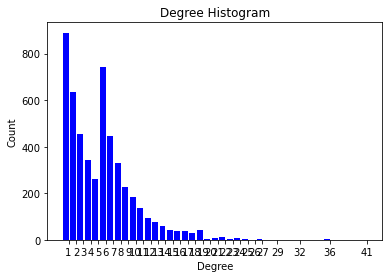

In [11]:
fig, ax = plt.subplots()
plt.bar(deg, cnt, width=0.80, color="b")
plt.title("Degree Histogram")
plt.ylabel("Count")
plt.xlabel("Degree")
ax.set_xticks([d + 0.4 for d in deg])
ax.set_xticklabels(deg)

(1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 29, 32, 36, 41)
(890, 635, 455, 343, 263, 742, 447, 329, 226, 186, 137, 95, 78, 61, 44, 37, 38, 28, 43, 5, 7, 12, 3, 6, 4, 1, 3, 1, 1, 2, 1)


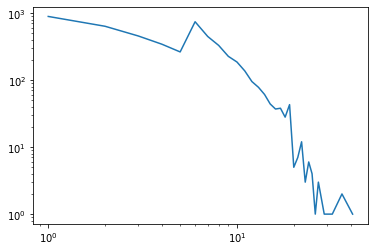

In [12]:
deg = deg[::-1]
cnt = cnt[::-1]
print(deg)
print(cnt)
plt.loglog(deg, cnt)

By the network statistics, my graph has number of nodes: 7250,
number of edges: 7984
Average degree:  2.2025, diameter 49 and density 0.003. 

(source data = id column, target data = reference column)
By the histogram, our dataset has the nodes with degree = 1 at most. Though I selected papers with 10-20 references as source data, but there is not many records for the target data. So, for most paper selected, the cited paper for our source data is only count once or twice. This happens because the sample size of my data is small, which cannot include all records for a certain paper in target data.This can explain why the density is low, since most nodes with degree 1. (D=|E| / |V|(|V|−1))

Since the histogram is sparsed, choose to draw the loglog graph, because it can show other degree's patten other than 1. 
log–log plot is a two-dimensional graph of numerical data that uses logarithmic scales on both the horizontal and vertical axes.
This graph helps show other point's degree. When x axis increases, there is a trend for y axis, number of count, decrease then increase about the point 10^1 on the log-log plot. 


Part 3

In [13]:
# Degree Centrality
# average

sum(list(nx.degree_centrality(G_subgraph).values()))/5123 # 5123 is number of nodes



0.0011112040142064077

This means the nodes are not central, it shows there is not many connections for each nodes.

In [14]:
# sort by degree

dict(sorted(nx.degree_centrality(G_subgraph).items(), key=lambda item: item[1],reverse=True))

{'35ba5778-6cd0-4b79-87ab-a524877af431': 0.00800468566966029,
 '6a3af9fb-a69f-4d86-99df-1e1f0a8ac686': 0.007028504490433424,
 'dae15c18-f826-42ba-a0f5-d423f9330f0e': 0.007028504490433424,
 '452e419f-6c61-4585-9ffd-76e52d5e5302': 0.006247559547051933,
 'f53b0113-1f84-45dd-b53c-4eeb2bb824e0': 0.005661850839515814,
 '43fd54c4-1948-41f8-9e23-c4342967c483': 0.005271378367825068,
 'fc46826b-3cd6-4962-ad91-7414541e7278': 0.005271378367825068,
 'facd4fec-dea4-4ae8-8e58-5eb775063550': 0.005271378367825068,
 '1e35adbd-6bb9-4511-87f6-4fbe9d5dd55f': 0.005076142131979696,
 'bfa4f7e1-70f3-49c0-a913-f0d0d856606e': 0.004880905896134323,
 '20471e68-802c-4a32-8f55-715b3dcbd92f': 0.004880905896134323,
 '5fcf98fa-8b7d-4377-9fbf-b57c5f807fc7': 0.004880905896134323,
 'e2e4a385-c6d5-41d0-bf06-b77bd434a468': 0.004880905896134323,
 '4454355a-ccd6-4bdc-beed-cb036e5d919c': 0.00468566966028895,
 '432cca1f-bfbf-47a5-90fc-3cfd00bca630': 0.00468566966028895,
 '73d78f67-8f88-4093-ae6e-99822464a5d3': 0.004685669660288

(array([2.323e+03, 1.781e+03, 6.440e+02, 2.200e+02, 1.140e+02, 3.200e+01,
        5.000e+00, 1.000e+00, 2.000e+00, 1.000e+00]),
 array([0.00019524, 0.00097618, 0.00175713, 0.00253807, 0.00331902,
        0.00409996, 0.00488091, 0.00566185, 0.0064428 , 0.00722374,
        0.00800469]),
 <a list of 10 Patch objects>)

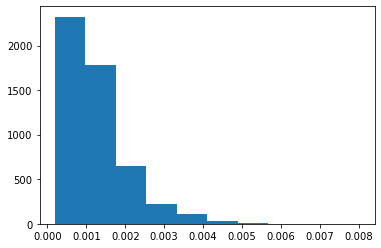

In [34]:
# histogram

import matplotlib.pyplot as plt

value = list(nx.degree_centrality(G_subgraph).values())
plt.hist(value)

In [15]:
# closeness centrality
# Closeness centrality scores each node based on their ‘closeness’ to all other nodes in the network.
# find individual who works quickly

sum(list(nx.closeness_centrality(G_subgraph).values()))/5123 # 5123 is number of nodes

0.15147121886047848

In [16]:
# by sort the model, we can find which one works quick.

dict(sorted(nx.closeness_centrality(G_subgraph).items(), key=lambda item: item[1],reverse=True))

{'6b0707da-5e96-4b79-be18-4d8c6d3dba28': 0.19933063511830634,
 'fc46826b-3cd6-4962-ad91-7414541e7278': 0.19829655439411537,
 'c5d73f15-467c-4824-8784-4bf66630fe94': 0.196674730253811,
 '6a3af9fb-a69f-4d86-99df-1e1f0a8ac686': 0.19620010725503714,
 '1011f70c-2bf0-4f6b-99cc-7ed150d92961': 0.19540668396154434,
 '29d1f8f8-2aa4-4591-a16a-c07b65ae86a5': 0.19504950495049506,
 '35ba5778-6cd0-4b79-87ab-a524877af431': 0.1942506067961165,
 'e7e46d61-1237-4275-96f9-ca6c5c1bbefc': 0.19365571477182503,
 '6c38b3b4-7562-493d-a40c-fe70abf039a7': 0.19326843257112672,
 '7b11227f-6886-434b-90c3-100bc89120fa': 0.1932611402482738,
 '3ec37e95-a062-47e1-8c2e-139e39372e0e': 0.19267228408065,
 '27c794fa-10a3-4fe0-ba6f-4d00658bda79': 0.19207259909251134,
 'e97d9c05-854e-4bd6-9301-11affc0d103f': 0.19195742607652813,
 '26e6025e-6616-4e0c-a4fa-31273678bd77': 0.19159839898253095,
 '9ebc616d-fbf8-477d-90c3-9b54e02fd95a': 0.19143369711466587,
 '94ca5c81-7da7-4b2e-8d5f-c62ec8db9539': 0.19133358236832276,
 'e8eeb39c-a478

(array([   5.,   37.,  125.,  352.,  785., 1092., 1245., 1086.,  359.,
          37.]),
 array([0.07952799, 0.09150825, 0.10348852, 0.11546878, 0.12744905,
        0.13942931, 0.15140958, 0.16338984, 0.17537011, 0.18735037,
        0.19933064]),
 <a list of 10 Patch objects>)

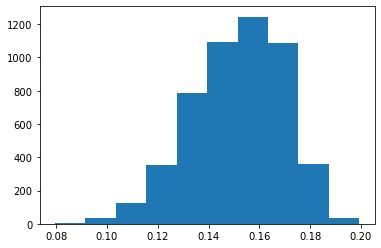

In [38]:
# histogram

import matplotlib.pyplot as plt

value = list(nx.closeness_centrality(G_subgraph).values())
plt.hist(value)

These nodes works quick

In [39]:
# Betweeness cetrality
# betweeness is the degree the node lies on the shortest path between two other nodes

# we can find which node influence the system in the network.


sum(list(nx.betweenness_centrality(G_subgraph).values()))/5123 # 5123 is number of nodes

0.001114467104581953

In [18]:
dict(sorted(nx.betweenness_centrality(G_subgraph).items(), key=lambda item: item[1],reverse=True))

{'6b0707da-5e96-4b79-be18-4d8c6d3dba28': 0.03503441375440127,
 '1011f70c-2bf0-4f6b-99cc-7ed150d92961': 0.024107149188010796,
 '5fafdd54-8868-4fc8-b0a8-083993fc222a': 0.02328187580156565,
 '6a3af9fb-a69f-4d86-99df-1e1f0a8ac686': 0.021414675698283932,
 '60ef3852-fa16-44bf-9434-9909268ba5d8': 0.02123201675683757,
 '3ec37e95-a062-47e1-8c2e-139e39372e0e': 0.01972833834079876,
 '63b18851-8ddb-4750-af19-ea3bd3942f58': 0.019262996986528304,
 '6a6b9aa6-683f-4c7c-b06e-9c3018d10fd3': 0.018543683699014466,
 'f56a7285-16cb-4a8e-8d89-e7ae9247e9b0': 0.018504178652219015,
 'cea6ac36-2cf8-49b5-b738-d6a03b16ed06': 0.01699261928590165,
 '718c48d9-5435-45ea-9e44-b98577839b69': 0.016750053522512284,
 'e97d9c05-854e-4bd6-9301-11affc0d103f': 0.01650444210727797,
 '35ba5778-6cd0-4b79-87ab-a524877af431': 0.01609945007634111,
 '288106a6-f48d-44c2-98fb-bd4c257d6ff5': 0.015332845153131082,
 '6ff01654-66d1-49c7-b526-1c8ed7fa893a': 0.014191278358511618,
 'ac20391b-bbff-4926-9c74-08dd0fdac740': 0.014190019176202589,

(array([4.746e+03, 2.800e+02, 5.200e+01, 2.800e+01, 8.000e+00, 4.000e+00,
        4.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([0.        , 0.00350344, 0.00700688, 0.01051032, 0.01401377,
        0.01751721, 0.02102065, 0.02452409, 0.02802753, 0.03153097,
        0.03503441]),
 <a list of 10 Patch objects>)

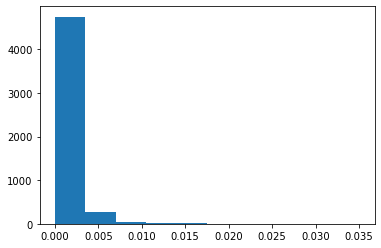

In [37]:
# histogram

import matplotlib.pyplot as plt

value = list(nx.betweenness_centrality(G_subgraph).values())
plt.hist(value)

These nodes influence the system a lot.

Question 4

In [19]:

import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import scipy.sparse as sp
import numpy as np
from sklearn.metrics import roc_auc_score
from sklearn.metrics import average_precision_score
import pickle
from gae.preprocessing import mask_test_edges

In [20]:
np.random.seed(0) # make sure train-test split is consistent between notebooks
adj_sparse = nx.to_scipy_sparse_matrix(G_subgraph)

# Perform train-test split
adj_train, train_edges, train_edges_false, val_edges, val_edges_false, \
    test_edges, test_edges_false = mask_test_edges(adj_sparse, test_frac=.3, val_frac=.1)
g_train = nx.from_scipy_sparse_matrix(adj_train) # new graph object with only non-hidden edges

In [21]:

# Inspect train/test split
print ("Total nodes:", adj_sparse.shape[0])
print ("Total edges:", int(adj_sparse.nnz/2)) # adj is symmetric, so nnz (num non-zero) = 2*num_edges
print ("Training edges (positive):", len(train_edges))
print ("Training edges (negative):", len(train_edges_false))
print ("Validation edges (positive):", len(val_edges))
print ("Validation edges (negative):", len(val_edges_false))
print ("Test edges (positive):", len(test_edges))
print ("Test edges (negative):", len(test_edges_false))

Total nodes: 5123
Total edges: 14579
Training edges (positive): 8749
Training edges (negative): 8749
Validation edges (positive): 1457
Validation edges (negative): 1457
Test edges (positive): 4373
Test edges (negative): 4373


In [22]:
def get_roc_score(edges_pos, edges_neg, score_matrix):
    # Store positive edge predictions, actual values
    preds_pos = []
    pos = []
    for edge in edges_pos:
        preds_pos.append(score_matrix[edge[0], edge[1]]) # predicted score
        pos.append(adj_sparse[edge[0], edge[1]]) # actual value (1 for positive)
        
    # Store negative edge predictions, actual values
    preds_neg = []
    neg = []
    for edge in edges_neg:
        preds_neg.append(score_matrix[edge[0], edge[1]]) # predicted score
        neg.append(adj_sparse[edge[0], edge[1]]) # actual value (0 for negative)
        
    # Calculate scores
    preds_all = np.hstack([preds_pos, preds_neg])
    labels_all = np.hstack([np.ones(len(preds_pos)), np.zeros(len(preds_neg))])
    roc_score = roc_auc_score(labels_all, preds_all)
    ap_score = average_precision_score(labels_all, preds_all)
    return roc_score, ap_score

# Adamic-Adar

In [23]:
nx.adamic_adar_index(g_train)

<generator object _apply_prediction.<locals>.<genexpr> at 0x0000022685419DC8>

In [24]:
# Compute Adamic-Adar indexes from g_train
aa_matrix = np.zeros(adj_train.shape)
for u, v, p in nx.adamic_adar_index(g_train): # (u, v) = node indices, p = Adamic-Adar index
    aa_matrix[u][v] = p
    aa_matrix[v][u] = p # make sure it's symmetric
    
# Normalize array
aa_matrix = aa_matrix / aa_matrix.max()

In [25]:

# Calculate ROC AUC and Average Precision
aa_roc, aa_ap = get_roc_score(test_edges, test_edges_false, aa_matrix)

print ('Adamic-Adar Test ROC score: ', str(aa_roc))
print ('Adamic-Adar Test AP score: ', str(aa_ap))

Adamic-Adar Test ROC score:  0.501258110009089
Adamic-Adar Test AP score:  0.5013983084661389


# Jaccard Coefficient

In [26]:
# Compute Jaccard Coefficients from g_train
jc_matrix = np.zeros(adj_train.shape)
for u, v, p in nx.jaccard_coefficient(g_train): # (u, v) = node indices, p = Jaccard coefficient
    jc_matrix[u][v] = p
    jc_matrix[v][u] = p # make sure it's symmetric
    
# Normalize array
jc_matrix = jc_matrix / jc_matrix.max()

In [27]:
# Calculate ROC AUC and Average Precision
jc_roc, jc_ap = get_roc_score(test_edges, test_edges_false, jc_matrix)

print ('Jaccard Coefficient Test ROC score: ', str(jc_roc))
print ('Jaccard Coefficient Test AP score: ', str(jc_ap))

Jaccard Coefficient Test ROC score:  0.5012551816180292
Jaccard Coefficient Test AP score:  0.5002813093393331


# Preferential Attachment

In [28]:

# Calculate, store Adamic-Index scores in array
pa_matrix = np.zeros(adj_train.shape)
for u, v, p in nx.preferential_attachment(g_train): # (u, v) = node indices, p = Jaccard coefficient
    pa_matrix[u][v] = p
    pa_matrix[v][u] = p # make sure it's symmetric
    
# Normalize array
pa_matrix = pa_matrix / pa_matrix.max()

In [29]:
# Calculate ROC AUC and Average Precision
pa_roc, pa_ap = get_roc_score(test_edges, test_edges_false, pa_matrix)

print ('Preferential Attachment Test ROC score: ', str(pa_roc))
print ('Preferential Attachment Test AP score: ', str(pa_ap))

Preferential Attachment Test ROC score:  0.7115488004081341
Preferential Attachment Test AP score:  0.6819127081409749
